## Sample 500 transcription factors across 5 orders of magnitude


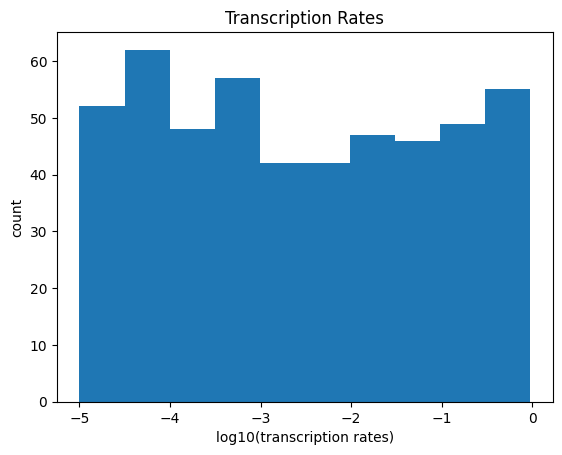

In [1]:
# sample 500 transcription rates randomly
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand

transcription_rates = np.power(10, -5 * rand(500))

# plot histogram of transcription rates in log scale (x-axis) with title Transcription Rates
plt.hist(np.log10(transcription_rates))
plt.xlabel("log10(transcription rates)")
plt.ylabel("count")
plt.title("Transcription Rates")
plt.show()

In [3]:
from ssa_ex4 import SSA_w_protein
from tqdm.notebook import tqdm

sims = []
for transcription_rate in tqdm(transcription_rates[:10], desc="Running Simulations"):
    ssa = SSA_w_protein(
        k0_mRNA_production_rate=transcription_rate,
        k1_mRNA_degradation_rate=0.01,
        k2_protein_production_rate=5,
        k3_protein_degradation_rate=1,
    )
    sims.append(
        ssa.run_simulation(
            timesteps=1000,
            initial_mRNA_level=0,
            start_time=0.0,
            timestep_sec=1,
        )
    )

    # after each 10 simulations, append to file
    if len(sims) % 10 == 0:
        np.save("sims.npy", sims)

Running Simulations:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
s